In [1]:
import pandas as pd
import altair as alt
from vega_datasets import data

In [3]:
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [5]:
print(data.list_datasets())

['7zip', 'airports', 'annual-precip', 'anscombe', 'barley', 'birdstrikes', 'budget', 'budgets', 'burtin', 'cars', 'climate', 'co2-concentration', 'countries', 'crimea', 'disasters', 'driving', 'earthquakes', 'ffox', 'flare', 'flare-dependencies', 'flights-10k', 'flights-200k', 'flights-20k', 'flights-2k', 'flights-3m', 'flights-5k', 'flights-airport', 'gapminder', 'gapminder-health-income', 'gimp', 'github', 'graticule', 'income', 'iowa-electricity', 'iris', 'jobs', 'la-riots', 'londonBoroughs', 'londonCentroids', 'londonTubeLines', 'lookup_groups', 'lookup_people', 'miserables', 'monarchs', 'movies', 'normal-2d', 'obesity', 'ohlc', 'points', 'population', 'population_engineers_hurricanes', 'seattle-temps', 'seattle-weather', 'sf-temps', 'sp500', 'stocks', 'udistrict', 'unemployment', 'unemployment-across-industries', 'uniform-2d', 'us-10m', 'us-employment', 'us-state-capitals', 'volcano', 'weather', 'weball26', 'wheat', 'windvectors', 'world-110m', 'zipcodes']


In [6]:
movies_data = data.movies()

movies_data.sample(5)

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time min,Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
40,AstÈrix aux Jeux Olympiques,999811.0,132999811.0,NaN,113500000.0,Jul 04 2008,Not Rated,NaN,Alliance,Based on Comic/Graphic Novel,Adventure,Fantasy,None,NaN,4.9,5620.0
647,Niagara,2500000.0,2500000.0,NaN,1250000.0,Jan 21 1953,None,NaN,20th Century Fox,None,None,None,None,NaN,7.0,4698.0
2490,Payback,81526121.0,161626121.0,NaN,50000000.0,Feb 05 1999,R,110.0,Paramount Pictures,Based on Book/Short Story,Action,Contemporary Fiction,None,51.0,5.8,304.0
2931,Team America: World Police,32774834.0,50274834.0,NaN,20000000.0,Oct 15 2004,R,98.0,Paramount Pictures,Original Screenplay,Comedy,Contemporary Fiction,Trey Parker,NaN,7.3,58763.0
512,The Land Before Time,48092846.0,81972846.0,NaN,12300000.0,Nov 18 1988,None,NaN,Universal,Original Screenplay,Adventure,Historical Fiction,Don Bluth,71.0,6.9,14017.0


In [7]:
movies_data.shape

(3201, 16)

In [9]:
movies_data.columns

Index(['Title', 'US Gross', 'Worldwide Gross', 'US DVD Sales',
       'Production Budget', 'Release Date', 'MPAA Rating', 'Running Time min',
       'Distributor', 'Source', 'Major Genre', 'Creative Type', 'Director',
       'Rotten Tomatoes Rating', 'IMDB Rating', 'IMDB Votes'],
      dtype='object')

In [11]:
movies_data.isnull().sum()

Title                        1
US Gross                     7
Worldwide Gross              7
US DVD Sales              2637
Production Budget            1
Release Date                 0
MPAA Rating                605
Running Time min          1992
Distributor                232
Source                     365
Major Genre                275
Creative Type              446
Director                  1331
Rotten Tomatoes Rating     880
IMDB Rating                213
IMDB Votes                 213
dtype: int64

In [14]:
movies_data.dropna(inplace = True)

In [15]:
movies_data.shape

(174, 16)

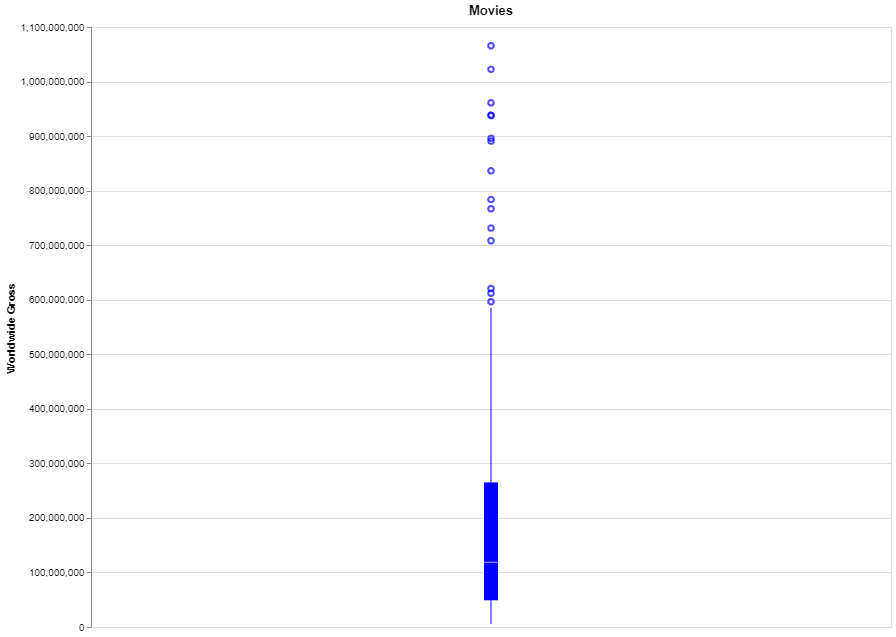

In [18]:
alt.Chart(movies_data, height = 600, width = 800)\
    .mark_boxplot(color = 'blue')\
    .encode(y='Worldwide Gross:Q')\
    .properties(title = 'Movies')

<h3>Observe the outliers in the above boxplot graph - probably they are blockbuster movies </h3>

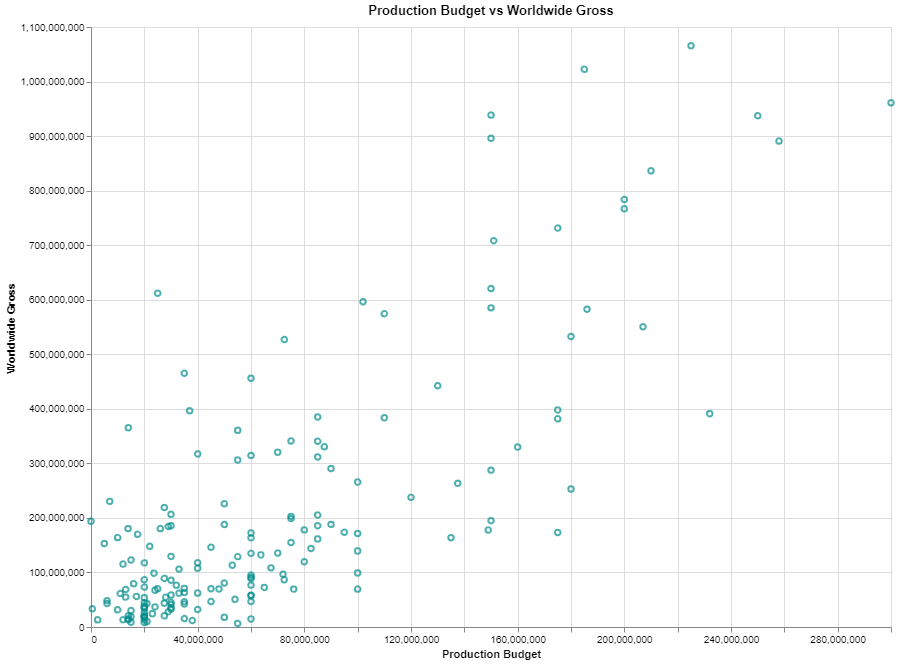

In [21]:
'''Relationship between the production budget and Worldwide gross. Large action movies usually get released during summer'''
alt.Chart(movies_data, height = 600, width = 800)\
    .mark_point(color = 'darkcyan') \
    .encode(x= 'Production Budget',
     y = 'Worldwide Gross')\
    .properties(title='Production Budget vs Worldwide Gross')

<h3> Based on the above graph - Production budgets are directly related to the worldwide gross collections</h3>

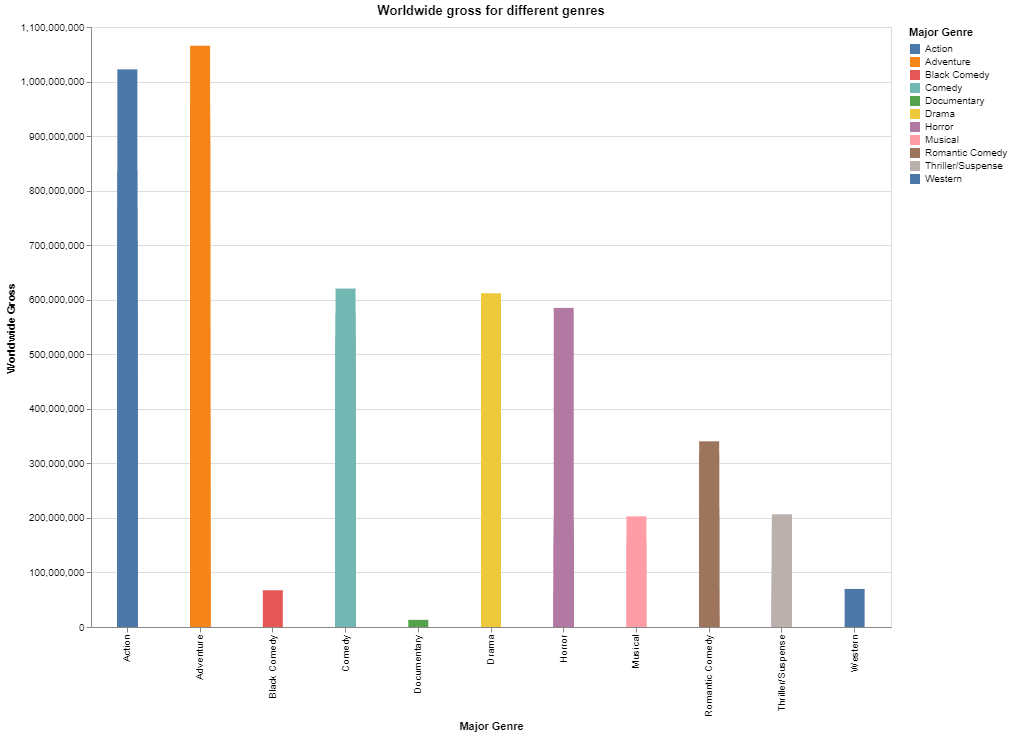

In [27]:
'''Assuming that different/specific genre have high worldwide collection. So, lets see the worldwide collection based on genre'''

alt.Chart(movies_data, height = 600, width = 800)\
    .mark_bar(size = 20) \
    .encode(x='Major Genre:O',
     y = 'Worldwide Gross:Q',
    color = 'Major Genre')\
    .properties(title='Worldwide gross for different genres')

<h3>The graph shows that the highest worrldwise gross genres are Action and Adventure and lowest is Documentary. So, either the Action and adventure gets a lot of money or there many be 
a lot of action and adventure movies as compared to documentary </h3>

In [28]:
med_rating = movies_data['Rotten Tomatoes Rating'].median()

med_rating

61.0

In [29]:
movies_data['above_average'] = (movies_data['Rotten Tomatoes Rating'] - med_rating) > 0

movies_data.head()

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time min,Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,above_average
1064,12 Rounds,12234694.0,18184083.0,8283859.0,20000000.0,Mar 27 2009,PG-13,108.0,20th Century Fox,Original Screenplay,Action,Contemporary Fiction,Renny Harlin,28.0,5.4,8914.0,False
1074,2012,166112167.0,766812167.0,50736023.0,200000000.0,Nov 13 2009,PG-13,158.0,Sony Pictures,Original Screenplay,Action,Science Fiction,Roland Emmerich,39.0,6.2,396.0,False
1090,300,210614939.0,456068181.0,261252400.0,60000000.0,Mar 09 2007,R,117.0,Warner Bros.,Based on Comic/Graphic Novel,Action,Historical Fiction,Zack Snyder,60.0,7.8,235508.0,False
1095,3:10 to Yuma,53606916.0,69791889.0,51359371.0,48000000.0,Sep 02 2007,R,117.0,Lionsgate,Remake,Western,Historical Fiction,James Mangold,89.0,7.9,98355.0,True
1107,88 Minutes,16930884.0,32955399.0,11385055.0,30000000.0,Apr 18 2008,R,106.0,Sony Pictures,Original Screenplay,Thriller/Suspense,Contemporary Fiction,Jon Avnet,5.0,5.9,31205.0,False


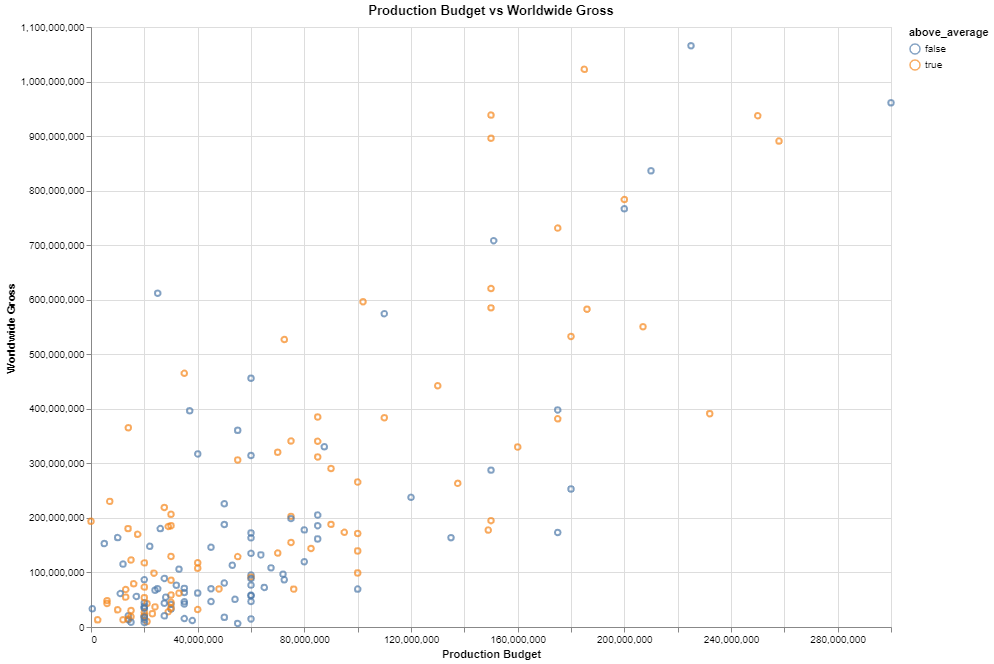

In [30]:
'''Checking the production budget vs worldwide gross whether they are above average or not'''

alt.Chart(movies_data, height = 600, width = 800)\
    .mark_point(color = 'darkcyan') \
    .encode(x= 'Production Budget',
     y = 'Worldwide Gross',
    color = 'above_average')\
    .properties(title='Production Budget vs Worldwide Gross')

<h3> The result came out to be mixed. High and low production movies are above average. Lets understand how the worldwide collection of movies on genre and above average</h3>

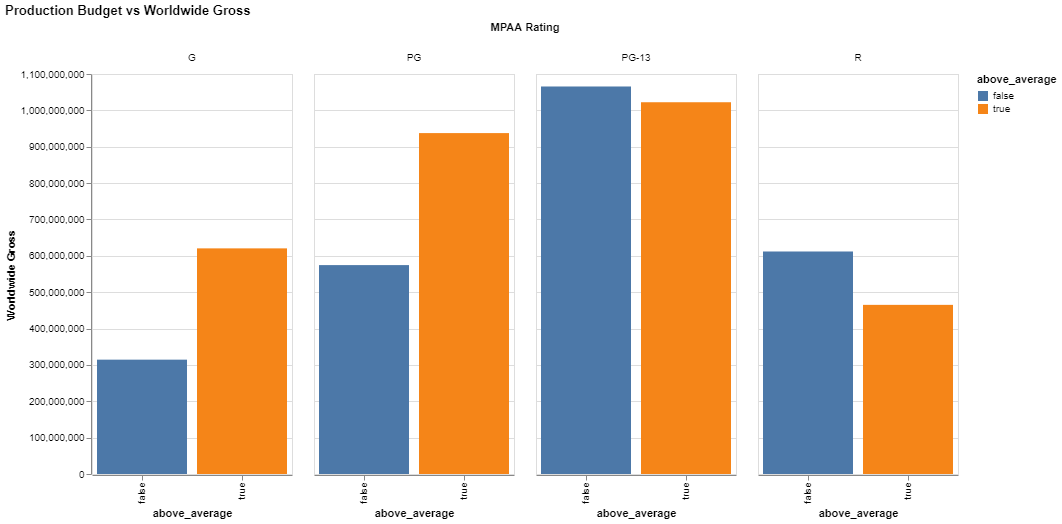

In [34]:
alt.Chart(movies_data, height = 400, width = 200)\
    .mark_bar() \
    .encode(x= 'above_average:O',
     y = 'Worldwide Gross:Q',
    color = 'above_average:N',
    column = 'MPAA Rating:N')\
    .properties(title='Production Budget vs Worldwide Gross')

In [35]:
movies_data.columns

Index(['Title', 'US Gross', 'Worldwide Gross', 'US DVD Sales',
       'Production Budget', 'Release Date', 'MPAA Rating', 'Running Time min',
       'Distributor', 'Source', 'Major Genre', 'Creative Type', 'Director',
       'Rotten Tomatoes Rating', 'IMDB Rating', 'IMDB Votes', 'above_average'],
      dtype='object')

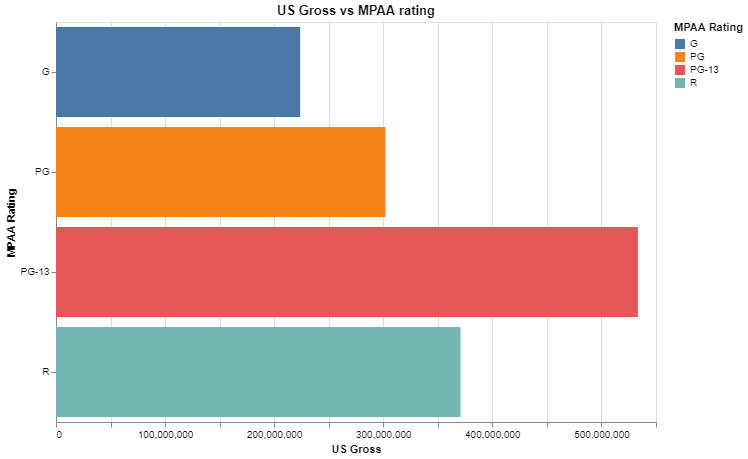

In [38]:
alt.Chart(movies_data, height = 400, width = 600)\
    .mark_bar() \
    .encode(x= 'US Gross',
     y = 'MPAA Rating',
    color = 'MPAA Rating',
    order = alt.Order('MPAA Rating',
                     sort = 'ascending'))\
    .properties(title='US Gross vs MPAA rating')

<h3> Based on the above graph - the highest gross movies in the US are PG-13</h3>